<a href="https://colab.research.google.com/github/santiagoahl/telco-costumer-churn/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn prediction

[Link of competition](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

>[Telco Customer Churn prediction](#scrollTo=CXRf6By2llxz)

>[Libraries](#scrollTo=ia7fKei0rHqc)

>[Data import](#scrollTo=KSlUi3-wrJdE)

>[Data preprocessing](#scrollTo=BeIe2iUXp2yD)

>>[Data cleaning](#scrollTo=DyEPwQTXqQ-L)

>>>[Convert object values to float64](#scrollTo=hys1PhE8p5JS)

>>>[Null data handling](#scrollTo=4HjbWx86qjfZ)

>>>[Drop ID feature](#scrollTo=cqs1Rvfhq2AE)

>>>[Cast target feature to numeric](#scrollTo=gfa0BKrArMDW)

>>>[Cast categorical features to numeric: OneHotEncoding](#scrollTo=zb6KflH1rxK1)

>>[Correlation analysis](#scrollTo=iRaFNPtpsflJ)

>>[Drop non-relevant features](#scrollTo=HOlQEQD67yn7)

>>[Data normalization](#scrollTo=3TjdjMWFsiSJ)

>>[Balancing the dataset: SMOTE](#scrollTo=Cftbe6YTCW7J)

>>[New correlation analysis](#scrollTo=lGCVOI4J_c02)

>[Exploratory data analysis](#scrollTo=8XGXDSdUwa_6)

>>[View categorical features](#scrollTo=kAc_QInxxDWR)

>>[View numerical features](#scrollTo=PFqTVQewyBfU)

>[Training](#scrollTo=75wmYz2NzX4k)

>[Testing: MLE](#scrollTo=DIa9Oa5N05SU)

>[Model evaluation](#scrollTo=EdfUJUOS3jYq)

>>[Confusion matrix](#scrollTo=1RXC21a84PfO)

>>[Model export](#scrollTo=LAm5ojcHEsdW)

>[Results](#scrollTo=_uaOH88_EiLR)



# Libraries

In [260]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE

import joblib

# Data import

In [221]:
df = pd.read_csv('/content/drive/MyDrive/cursos_platzi/Machine Learning con python/logistic-regression/telco-costumer-churm/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [196]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data preprocessing

## Data cleaning

### Convert `object` values to `float64`

In [222]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

### Null data handling

In [223]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [224]:
df.dropna(inplace=True)

### Drop ID feature

In [225]:
df.drop(['customerID'], axis=1, inplace=True)

### Cast target feature to numeric

In [226]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No', value=0, inplace=True)

df_num = df.copy()

### Cast categorical features to numeric: OneHotEncoding

In [228]:
df = pd.get_dummies(df)
df

,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes
0,29.85,0,0,0,1,1,0,0,0,1
1,1889.50,0,1,0,0,0,1,0,1,0
2,108.15,1,0,0,1,1,0,0,0,1
3,1840.75,0,1,0,0,0,1,0,1,0
4,151.65,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,0,1,0,0,0,1,0,0,1
7039,7362.90,0,0,0,1,0,1,0,0,1
7040,346.45,0,1,0,0,1,0,0,0,1
7041,306.60,1,1,0,0,1,0,0,0,1


## Correlation analysis

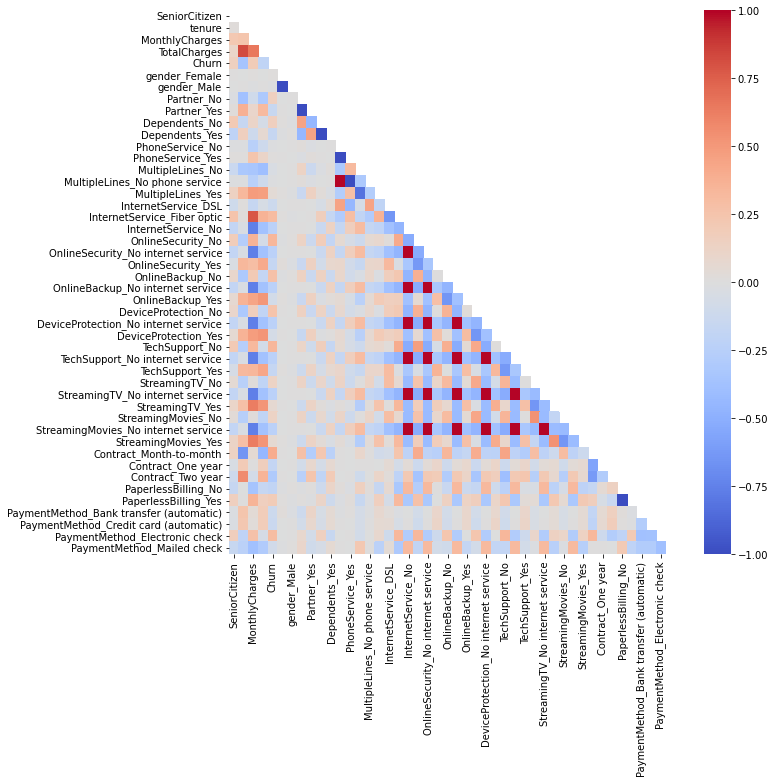

In [95]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), cmap='coolwarm', mask=np.triu(df.corr()))
plt.show()

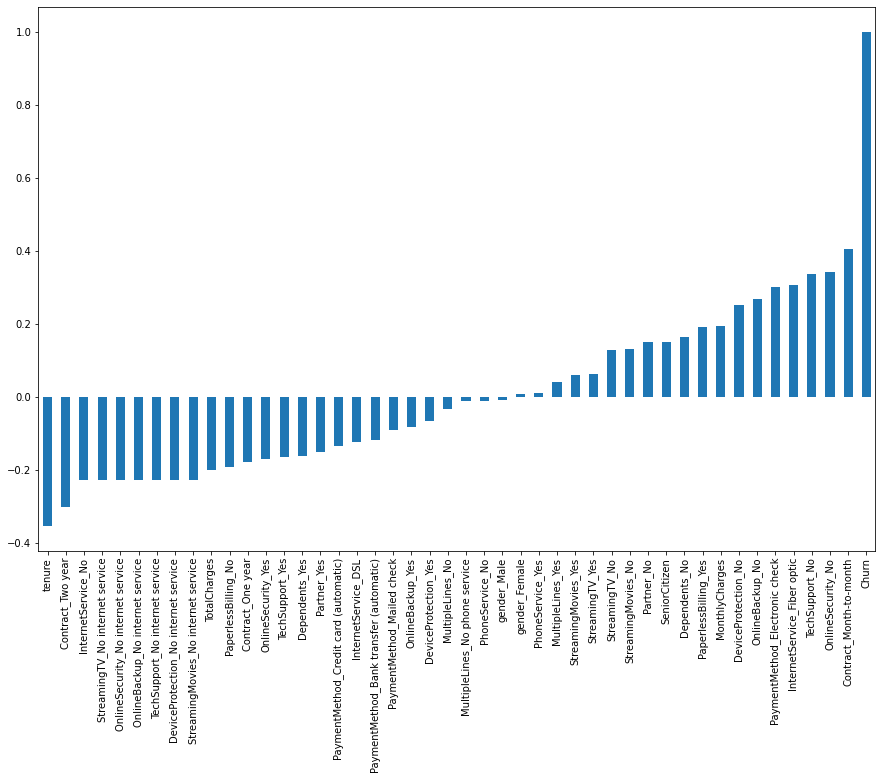

In [135]:
plt.figure(figsize=(15, 10))
df.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Drop non-relevant features

In [185]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [227]:
df.drop(['gender', 'MultipleLines', 'PhoneService', 'StreamingMovies', 'MonthlyCharges',
         'StreamingTV', 'PaymentMethod', 'InternetService', 'Partner', 'tenure',
         'Dependents', 'SeniorCitizen', 'TechSupport', 'DeviceProtection', 'OnlineSecurity'], 
        axis=1, inplace=True)

## Data normalization

In [229]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [230]:
sc = MinMaxScaler()
sc.fit(X_train)
X_train = pd.DataFrame(sc.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X.columns)

In [231]:
X_train.head()

,TotalCharges,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes
0,0.060120,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.180373,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.023263,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.057830,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.454059,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Balancing the dataset: SMOTE

In [239]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

In [244]:
# Split & Normalize again

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

sc = MinMaxScaler()
sc.fit(X_train)
X_train = pd.DataFrame(sc.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X.columns)

In [247]:
print(f'There are {len(X_sm)-len(X)} new data points')

There are 3294 new data points


## New correlation analysis

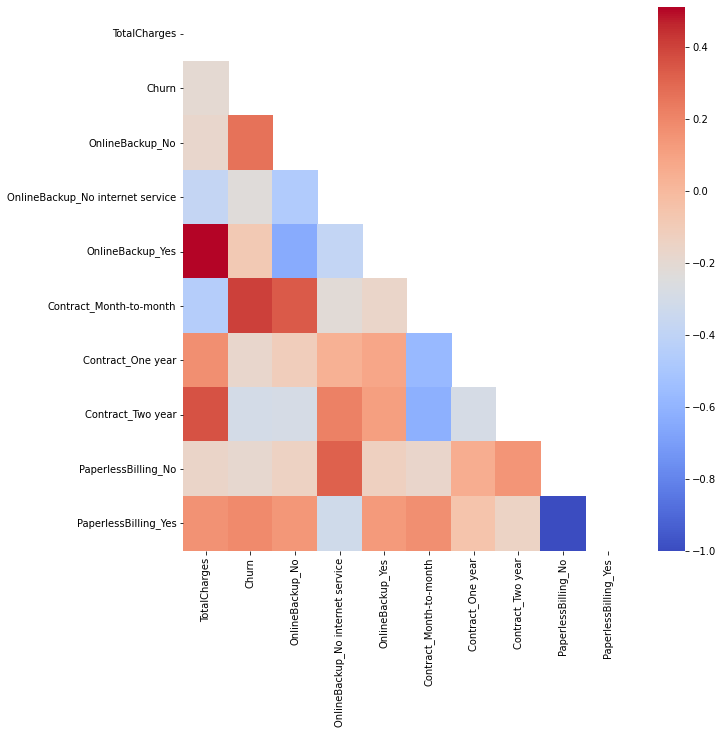

In [232]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), cmap='coolwarm', mask=np.triu(df.corr()))
plt.show()

# Exploratory data analysis

In [162]:
df_sc = pd.DataFrame(X_train)
df_sc['Churn'] = y_train

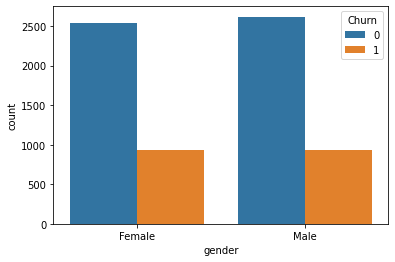

In [163]:
sns.countplot(data=df_num, x='gender', hue='Churn')
plt.show()

## View categorical features

In [107]:
def plot_categorical(column):
  plt.figure(figsize=(10, 10))
  sns.countplot(data=df_num,  x=column, hue='Churn')
  plt.show

In [108]:
column_cat = df_num.select_dtypes(include='object').columns

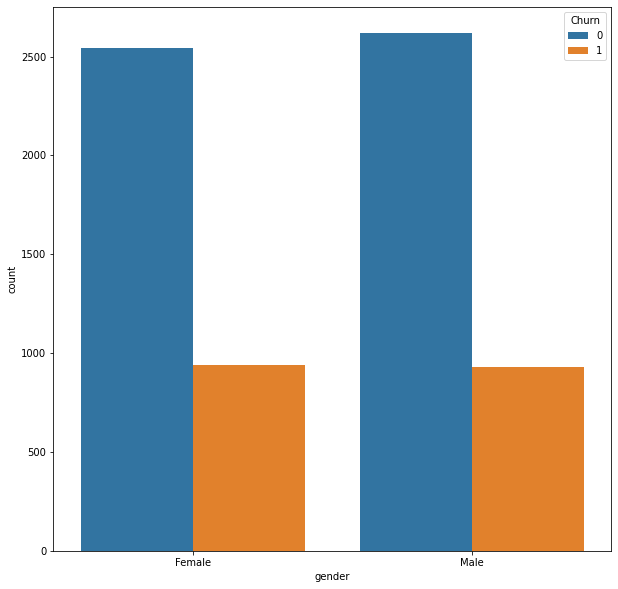

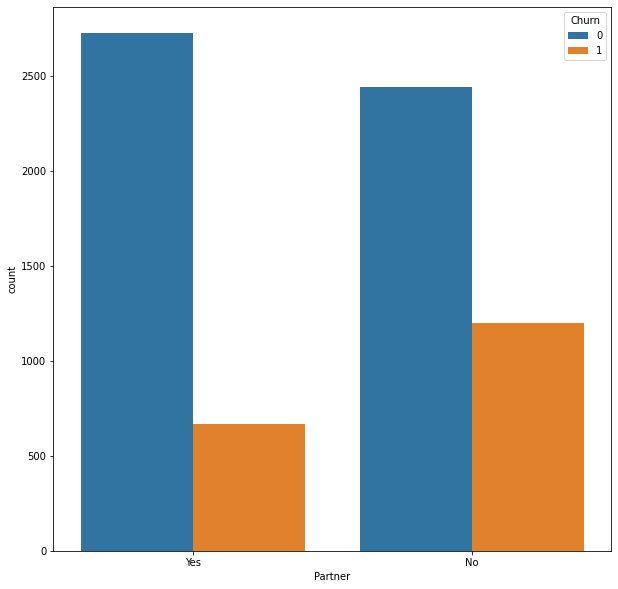

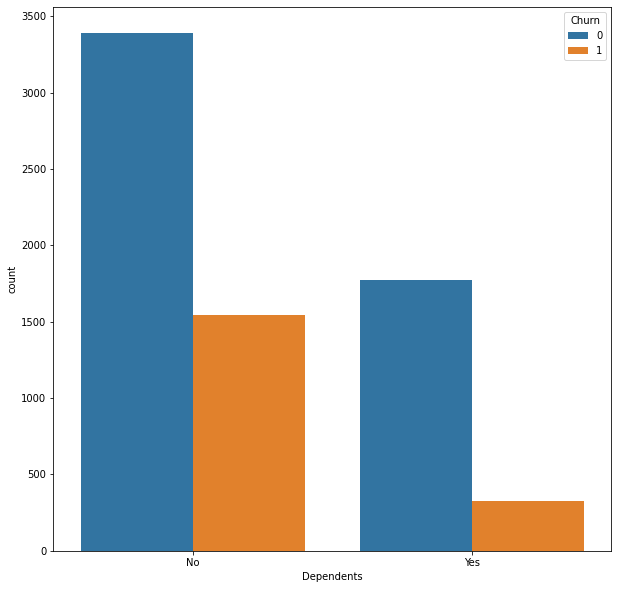

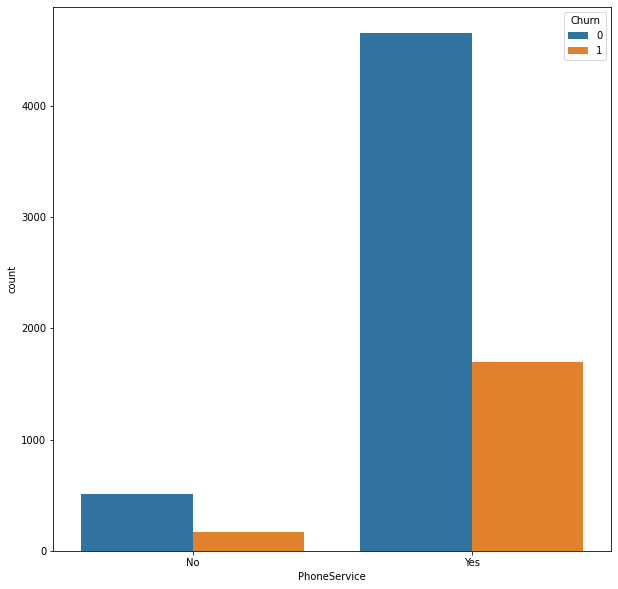

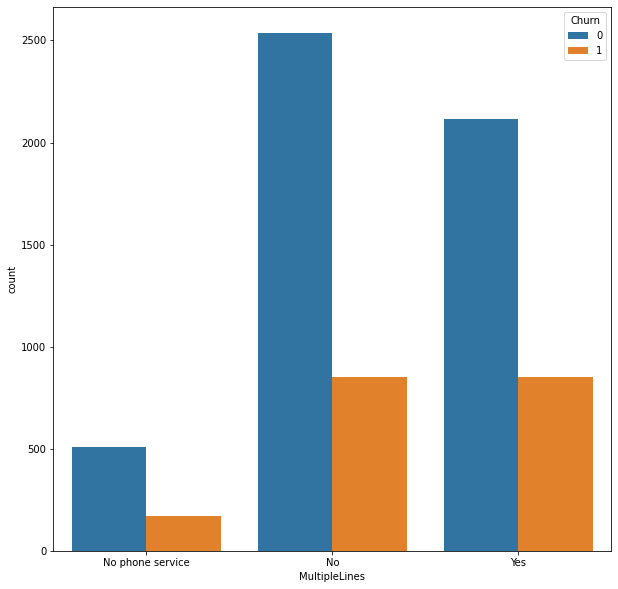

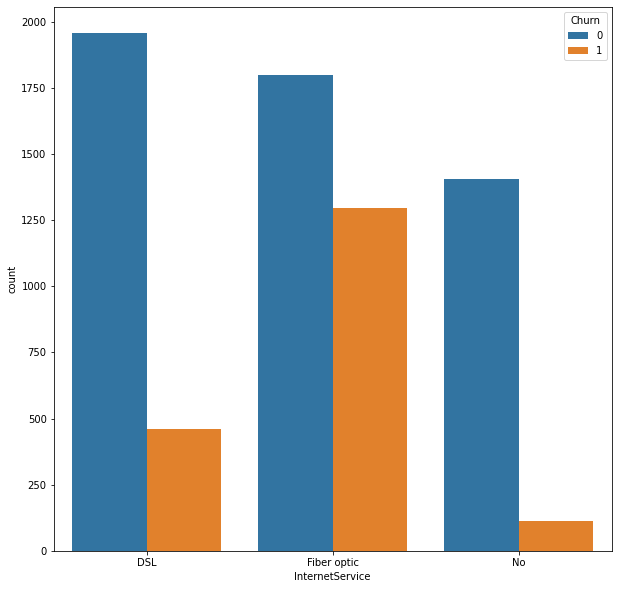

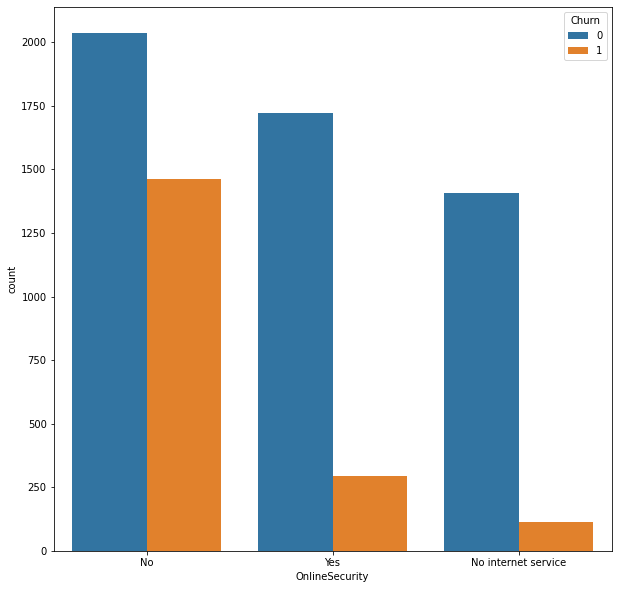

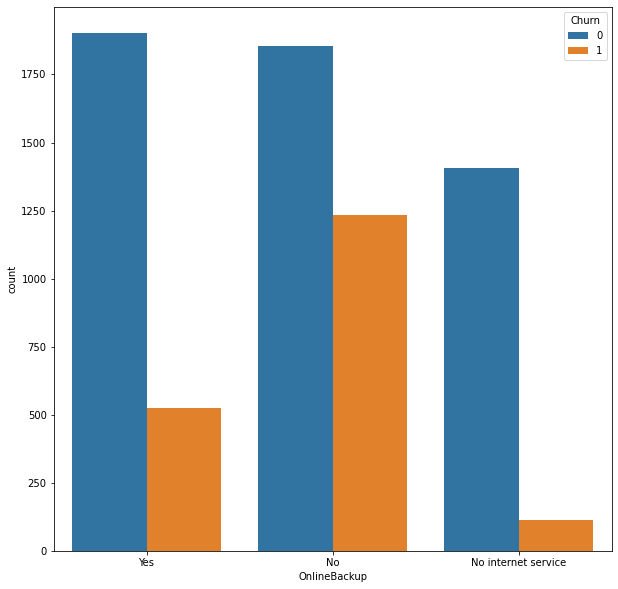

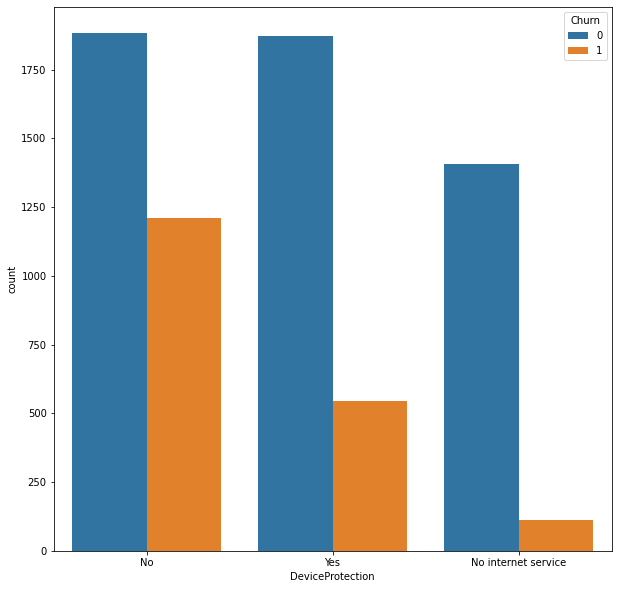

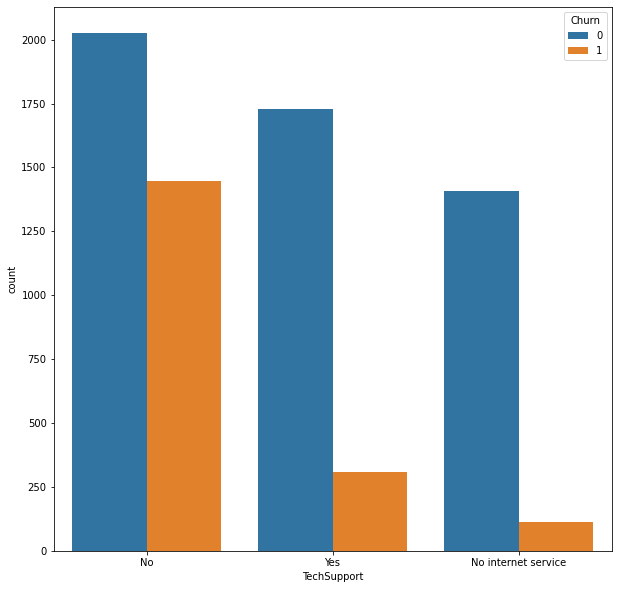

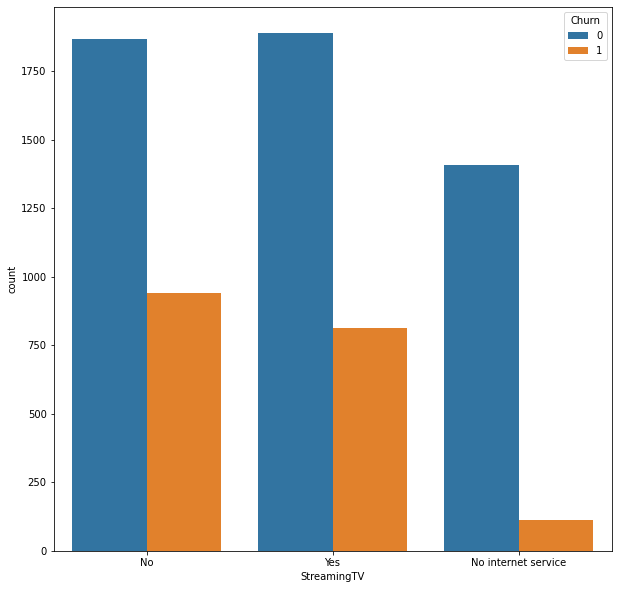

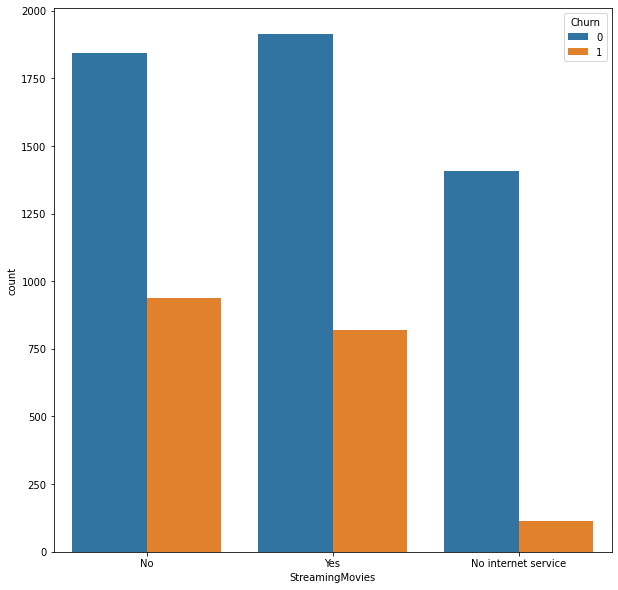

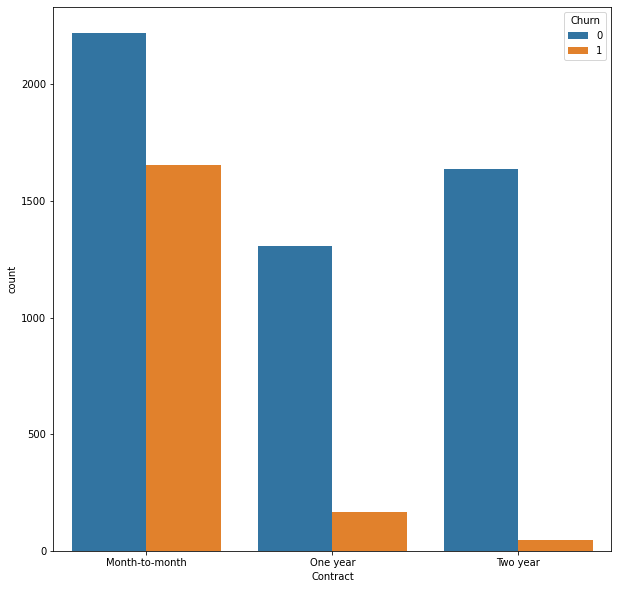

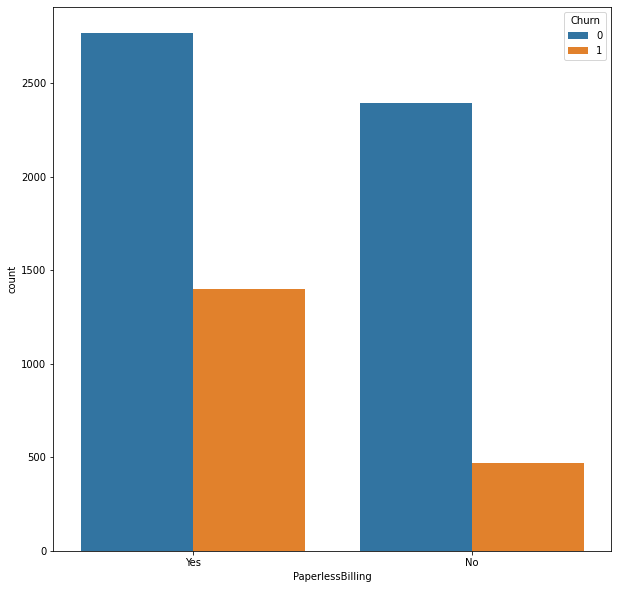

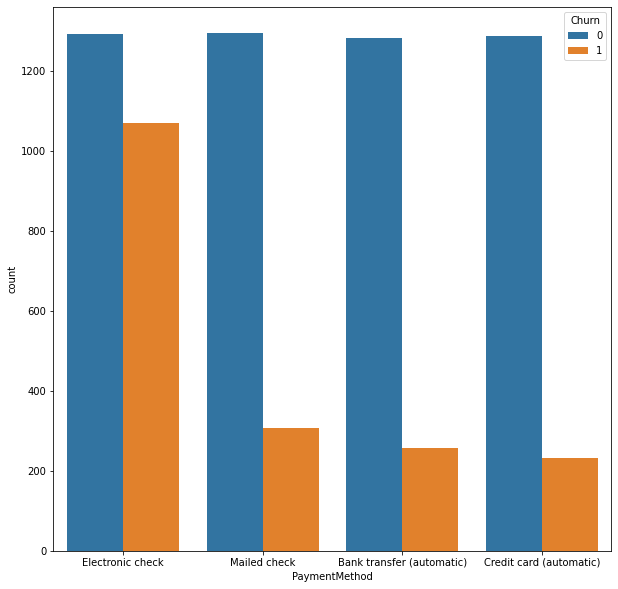

In [109]:
for c in column_cat:
  plot_categorical(c)

## View numerical features

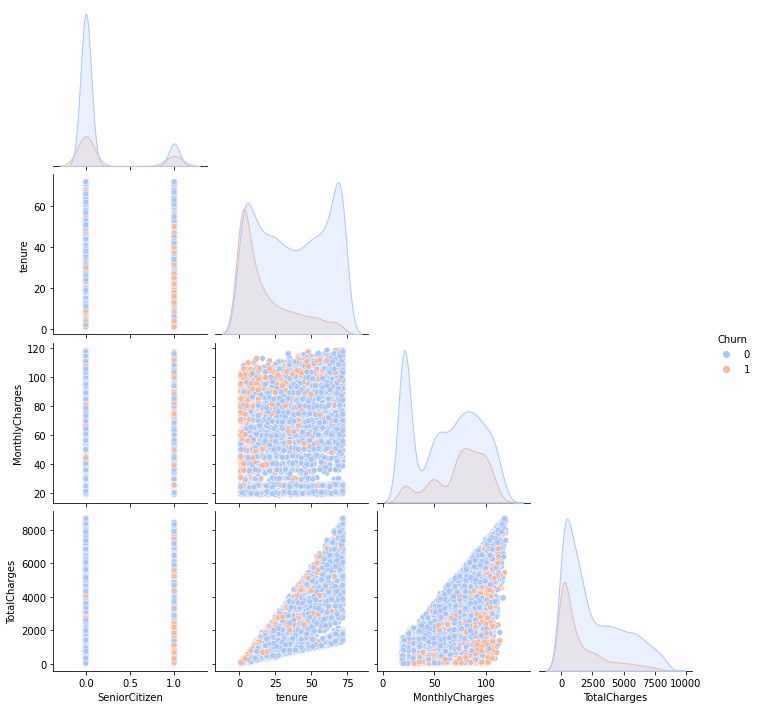

In [105]:
sns.pairplot(data=df_num, hue='Churn', corner=True, palette='coolwarm')
plt.show()

# Training

In [251]:
log_reg = LogisticRegression(penalty='l2', C=0.2, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.2, solver='liblinear')

In [252]:
y_pred = log_reg.predict(X_test)

# Testing: MLE

In [253]:
print(accuracy_score(y_test, y_pred))

0.7953518398967075


# Model evaluation

In [117]:
y_prob = log_reg.predict_proba(X_test)

In [118]:
y_prob

array([[0.99027663, 0.00972337],
       [0.86177964, 0.13822036],
       [0.3014359 , 0.6985641 ],
       ...,
       [0.99037061, 0.00962939],
       [0.70106107, 0.29893893],
       [0.82853079, 0.17146921]])

In [119]:
coef = log_reg.coef_

In [120]:
coef

array([[ 0.21784039, -3.11166574, -0.1623933 ,  1.20558453,  0.01210046,
        -0.01112456, -0.06064633,  0.06162223,  0.12843467, -0.12745878,
         0.09474575, -0.09376985, -0.15333394,  0.09474575,  0.05956409,
        -0.40991734,  0.518597  , -0.10770376,  0.24708131, -0.10770376,
        -0.13840165,  0.09123505, -0.10770376,  0.0174446 ,  0.06367848,
        -0.10770376,  0.04500118,  0.22790299, -0.10770376, -0.11922333,
        -0.07859449, -0.10770376,  0.18727415, -0.07982288, -0.10770376,
         0.18850254,  0.75074521, -0.08740667, -0.66236265, -0.10309451,
         0.1040704 ,  0.00387679, -0.15294591,  0.22173243, -0.07168741]])

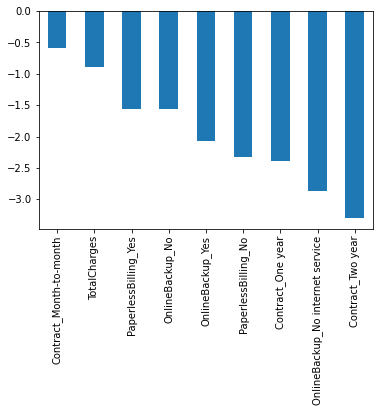

In [255]:
weights = pd.Series(log_reg.coef_[0], index=X_train.columns.values)
weights.sort_values(ascending=False)[:10].plot(kind='bar')
plt.show()

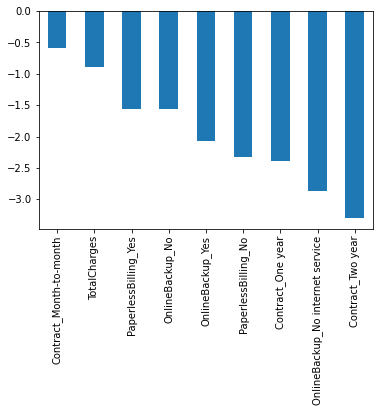

In [256]:
weights = pd.Series(log_reg.coef_[0], index=X_train.columns.values)
weights.sort_values(ascending=False)[-10:].plot(kind='bar')
plt.show()

In [254]:
f1_score(y_pred, y_test)

0.8098380323935213

## Confusion matrix

<Figure size 864x864 with 0 Axes>

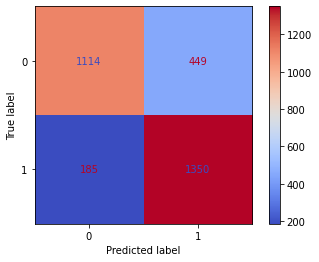

In [257]:
plt.figure(figsize=(12, 12))
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='coolwarm')
plt.show()

# Model export

In [266]:
def export_model(model, name):
  joblib.dump(model, '/content/drive/MyDrive/telco-costumer-churm/models/'+name+'.pkl')

In [ ]:
export_model(log_reg, 'model')

# Results

We obtain an `f1_score` of **80.9%** of this model.